In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [4]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import drive
drive.mount('/content/drive')

aus = pd.read_csv("/content/drive/MyDrive/Mineria Datos/ET/weatherAUS.csv")
aus.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


## Planteamiento de hipotesis predictivas

En primer lugar junto con mi equipo realizamos una exploracion de datos, observamos los tipos de datos y como estan compuestos, para planteanos una hipotesis predictiva la cual seria si llovera mañana en ciertas ciudades del continente australiano, por lo que hemos visto la gran parte de ciudades se encuentran en un lugar desertico como se aprecia en la imagen

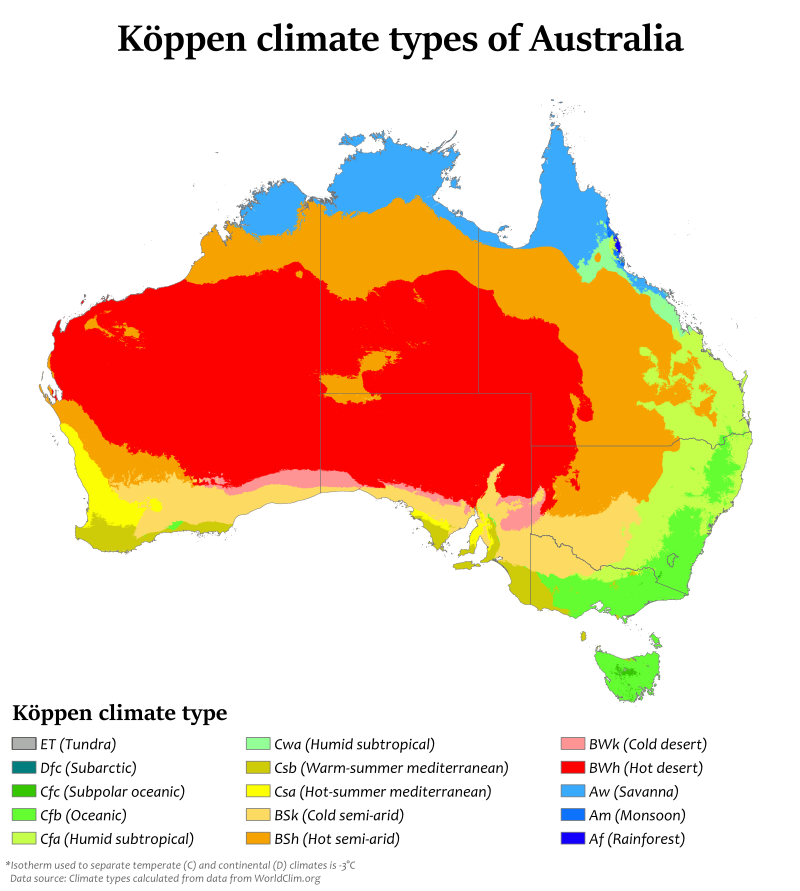

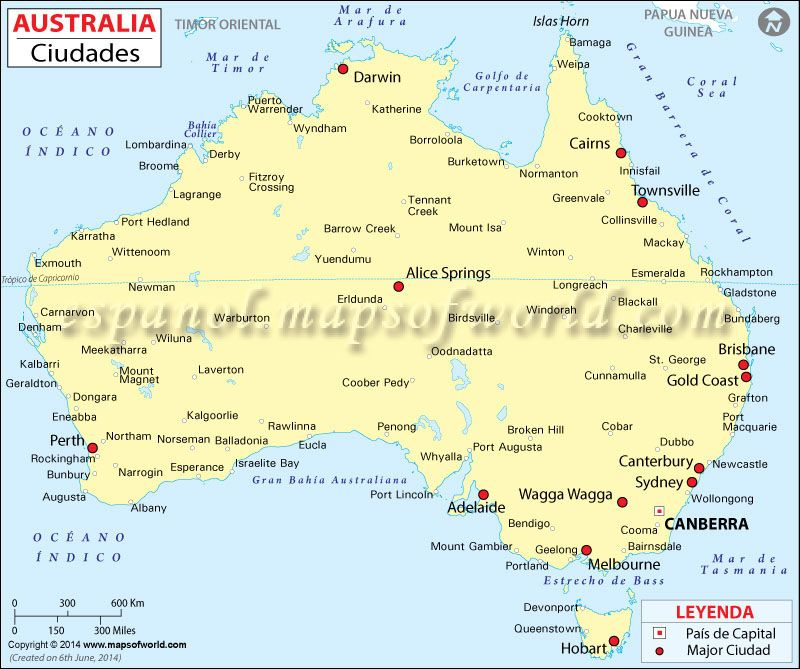

es por esto que a traves de los datos como temperaturas minimas y maximas, presion atmosfericas y el viento previamente estudiados queremos pronosticar y predecir si llovera el dia de mañana y el subsiguiente  

In [20]:
filtro0 = aus[aus["Location"]== 'AliceSprings']
filtro0

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
132890,2008-12-01,AliceSprings,19.6,37.6,0.0,11.2,9.8,WNW,87.0,NNE,...,16.0,1010.5,1005.8,0.0,3.0,30.4,37.2,No,1.2,Yes
132891,2008-12-02,AliceSprings,21.0,39.1,1.2,9.0,12.2,NNW,41.0,NNW,...,13.0,1009.3,1004.6,2.0,5.0,32.5,38.2,Yes,0.0,No
132892,2008-12-03,AliceSprings,22.9,40.9,0.0,11.6,12.6,NNW,48.0,ENE,...,11.0,1006.3,1003.4,0.0,3.0,35.0,40.4,No,0.0,No
132893,2008-12-04,AliceSprings,24.7,40.5,0.0,16.0,7.8,WNW,72.0,SSW,...,24.0,1008.7,1006.9,3.0,6.0,32.3,36.5,No,0.2,No
132894,2008-12-05,AliceSprings,23.4,32.4,0.2,12.2,4.1,SSW,46.0,S,...,43.0,1014.0,1010.7,7.0,6.0,26.8,31.1,No,2.6,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135916,2017-06-20,AliceSprings,0.7,21.3,0.0,NaN,NaN,E,31.0,WNW,...,25.0,1024.6,1020.9,NaN,NaN,9.2,20.7,No,0.0,No
135917,2017-06-21,AliceSprings,1.6,23.1,0.0,NaN,NaN,ESE,30.0,NaN,...,26.0,1024.9,1020.5,NaN,NaN,11.3,22.8,No,0.0,No
135918,2017-06-22,AliceSprings,2.9,25.6,0.0,NaN,NaN,E,26.0,NaN,...,23.0,1023.9,1019.4,NaN,NaN,11.6,25.1,No,0.0,No
135919,2017-06-23,AliceSprings,4.1,27.8,0.0,NaN,NaN,N,19.0,NE,...,18.0,1021.4,1017.3,NaN,NaN,15.1,27.2,No,0.0,No


In [21]:
filtro6 = aus[aus["Location"]== 'Cairns']
filtro6

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
84855,2008-12-01,Cairns,25.2,32.3,0.4,4.0,6.4,NE,31.0,E,...,66.0,1011.3,1008.1,5.0,7.0,31.2,30.7,No,8.4,Yes
84856,2008-12-02,Cairns,24.2,32.3,8.4,6.6,5.3,NE,35.0,S,...,62.0,1011.9,1008.0,7.0,7.0,29.0,31.1,Yes,0.6,No
84857,2008-12-03,Cairns,23.9,32.8,0.6,5.6,11.3,SSE,31.0,SSE,...,42.0,1012.2,1009.9,7.0,5.0,29.1,31.6,No,0.0,No
84858,2008-12-04,Cairns,22.2,33.6,0.0,9.6,12.3,SE,39.0,SSE,...,31.0,1013.3,1010.9,2.0,1.0,29.6,32.5,No,0.0,No
84859,2008-12-05,Cairns,23.2,33.5,0.0,11.6,11.8,SE,43.0,SSE,...,56.0,1013.8,1011.0,4.0,2.0,29.7,32.2,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87838,2017-06-21,Cairns,19.9,26.1,0.4,NaN,NaN,SE,48.0,S,...,78.0,1019.3,1016.3,8.0,8.0,20.8,23.4,No,0.2,No
87839,2017-06-22,Cairns,19.7,27.4,0.2,NaN,NaN,SE,46.0,SSE,...,61.0,1020.0,1016.7,NaN,8.0,23.0,25.2,No,1.0,No
87840,2017-06-23,Cairns,19.7,27.3,1.0,NaN,NaN,SE,39.0,S,...,55.0,1018.9,1015.3,8.0,8.0,21.2,25.7,No,1.2,Yes
87841,2017-06-24,Cairns,19.3,25.6,1.2,NaN,NaN,E,41.0,S,...,81.0,1016.2,1014.6,5.0,8.0,21.5,22.1,Yes,5.2,Yes


## exploracion de datos 

In [ ]:
aus.shape

(142193, 24)

In [19]:
aus["Location"].value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [ ]:
aus.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [29]:
filtro1 = aus[aus["Location"]== 'Eridunda']
filtro2 = aus[aus["Date"]== '2017-06-25']
filtro2.head(5)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
3010,2017-06-25,Albury,3.9,10.9,0.0,NaN,NaN,NNW,28.0,S,...,82.0,1020.5,1018.8,7.0,8.0,6.4,8.8,No,1.4,Yes
5938,2017-06-25,BadgerysCreek,0.8,18.6,0.2,NaN,NaN,WSW,31.0,NaN,...,40.0,1018.8,1015.5,NaN,NaN,6.9,17.8,No,0.0,No
8926,2017-06-25,Cobar,9.1,22.0,0.0,NaN,NaN,W,28.0,NE,...,33.0,1020.2,1017.4,1.0,3.0,13.0,20.8,No,0.0,No
11879,2017-06-25,CoffsHarbour,8.5,19.3,0.0,NaN,NaN,NW,17.0,WSW,...,61.0,1020.2,1017.0,7.0,8.0,13.3,18.2,No,0.0,No
14733,2017-06-25,Moree,6.7,22.2,0.0,NaN,NaN,W,19.0,E,...,31.0,1021.0,1017.7,5.0,NaN,11.4,21.7,No,0.0,No


In [22]:
filtro3 = aus[aus["MaxTemp"]> 45]
maxTemp = filtro3.sort_values('MaxTemp', ascending = False)
maxTemp.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
122576,2013-12-17,SalmonGums,23.5,45.1,0.0,NaN,NaN,NW,63.0,N,...,7.0,NaN,NaN,NaN,NaN,35.9,43.4,No,0.0,No
65958,2009-01-30,Melbourne,25.7,45.1,0.0,18.6,12.8,N,50.0,N,...,9.0,1011.8,1008.6,1.0,1.0,31.3,43.3,No,0.0,No
26392,2017-01-18,Penrith,25.1,45.1,0.0,NaN,NaN,SE,59.0,WNW,...,38.0,NaN,NaN,NaN,NaN,37.5,33.0,No,0.2,No
114204,2016-02-10,PearceRAAF,16.9,45.1,0.0,NaN,12.5,NW,39.0,ENE,...,15.0,1013.7,1010.8,0.0,NaN,30.1,40.0,No,0.0,No
95708,2014-01-14,Adelaide,25.3,45.1,0.0,10.2,7.4,N,48.0,NE,...,11.0,1009.5,1008.0,NaN,NaN,38.6,43.2,No,0.0,No


In [ ]:
filtro4 = aus[aus["MinTemp"]<20]
minTemp = filtro4.sort_values('MinTemp', ascending = False)
minTemp.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
15200,2010-03-12,Newcastle,19.9,24.7,0.0,NaN,NaN,NaN,NaN,SE,...,51.0,NaN,NaN,6.0,3.0,22.0,23.4,No,20.4,Yes
92882,2014-10-20,Townsville,19.9,29.9,0.0,13.8,11.4,ENE,56.0,ESE,...,45.0,1021.4,1017.2,1.0,NaN,26.6,27.7,No,0.0,No
42151,2011-02-26,Wollongong,19.9,26.7,0.0,NaN,NaN,NE,41.0,ENE,...,70.0,1012.7,1009.4,NaN,NaN,23.0,26.2,No,0.0,No
21376,2011-01-29,NorfolkIsland,19.9,24.4,0.4,3.6,11.9,SE,35.0,SE,...,75.0,1014.3,1015.1,3.0,3.0,21.9,23.4,No,0.0,No
42141,2011-02-16,Wollongong,19.9,25.5,0.0,NaN,NaN,NNE,31.0,SSE,...,73.0,1019.8,1016.4,7.0,8.0,21.9,24.2,No,0.0,No
